In [ ]:
%load_ext autoreload
%autoreload 2
#| default_exp geo_cluster


In [ ]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
#from libpysal.weights import Queen, KNN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt
import sys
import os
from pyproj import CRS, Transformer
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Cluster_ejemplo.Cluster_ejemplo import *
     

# Punto geográfico

Vamos a generar nuestros clustres ahora desde un punto de vista geográfico, y explicamos un poco como podemos transformar de un sistema de referencia a otro. 

In [ ]:
from pyproj import Transformer
tr = Transformer.from_pipeline("EPSG:15851")

Tomemos las coordenadas del cuadrado que delimita al polígono que forman los municipios de la zona metrepolitana de Monterrey. En el sistema de coordenadas EPSG:4326 (latitud longitud en decimales)

* Norte 26.40
* Sur 25.23
* Este -99.68
* Oeste -100.87

Todas las coordenadas que generemos se encontraran dentro de el cuadrado que usarremos como región de interes.



In [ ]:
data_rand_Monterrey= data_points(700, min_x = -100.87, min_y = 25.23, max_x= -99.68, max_y=26.40, seed = 1234)

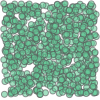

In [ ]:
data_rand_Monterrey.get_Multypoint()

In [ ]:
class data_geo(data_points):
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None,  crs ='EPSG:4326'):
        super().__init__( n, min_x, min_y , max_x, max_y, seed)
        self.crs = CRS(crs)
        
    def transfor_crs(self, to_crs):
        """Transform points from original crs to new crs"""
        transf = Transformer.from_crs(self.crs, to_crs)
        self.Points = [shapely.Point(transf.transform(p.x, p.y)) for p in self.Points ]
        self.crs = CRS(to_crs)


In [ ]:
data_rand_Monterrey = data_geo (500,crs ='EPSG:4326')

In [ ]:
data_rand_Monterrey.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
print(data_rand_Monterrey.get_Multypoint())

MULTIPOINT ((0.5081038246524049 0.4622338251260643), (0.8220303641980512 0.7492650047179608), (0.7724823459141705 0.4012006902297554), (0.2864034818938367 0.5302444237012949), (0.0813430481884383 0.7423346379956856), (0.1953401259330477 0.2743653263303148), (0.3361088150997252 0.9183040564808626), (0.0820080783679443 0.8654880279239708), (0.2626867212643381 0.9024104639973232), (0.6425287565904019 0.6157123078379778), (0.2644800732367624 0.4738325508274692), (0.5272937933438212 0.0806135562447767), (0.745126984640441 0.3104567690554804), (0.3635002721731722 0.4760151717110841), (0.4794463351250087 0.1390210591724338), (0.3966953339195193 0.3652687333827809), (0.0142535067190974 0.6718605005750623), (0.0448866764041455 0.6924518738342936), (0.8419546917858616 0.9640701059821379), (0.6563447739463195 0.3024581781165602), (0.7732471983742071 0.903715908926721), (0.4847530371150078 0.5673955313067424), (0.0973463693902853 0.2087417480696687), (0.2652669639213796 0.9705504104876105), (0.299

In [ ]:
data_rand_Monterrey.Points[0].x

0.5081038246524049

In [ ]:
data_rand_Monterrey.transfor_crs('6363')

In [ ]:
print(data_rand_Monterrey.get_Multypoint())

MULTIPOINT ((6377680.33280448 51453.06614897438), (6376939.661810504 83396.89503410191), (6377404.847893366 44657.059688151654), (6377784.723312454 59024.964187055935), (6377595.297671023 82633.91927422014), (6378027.053664789 30541.915379091253), (6377208.819997518 102219.01639356968), (6377402.844566802 96341.92455257113), (6377279.347820028 100450.67147579356), (6377370.383770596 68535.18055688354), (6377851.399831497 52745.638846893235), (6377862.397634908 8973.479595582186), (6377507.634082674 34556.817427341804), (6377789.38550275 52988.097677469814), (6377896.416702068 15475.20014030966), (6377855.5422797855 40660.285915778186), (6377698.301724539 74789.45251640637), (6377669.263467717 77081.49003383558), (6376550.201739149 107303.22029269976), (6377632.455349447 33667.1396691241), (6376766.764257386 100587.92394401133), (6377597.522399646 63158.90385217009), (6378085.527086354 23236.94038378185), (6377154.061072437 108034.86055516804), (6377916.084749505 41381.430622311236), (6

<matplotlib.collections.PathCollection>

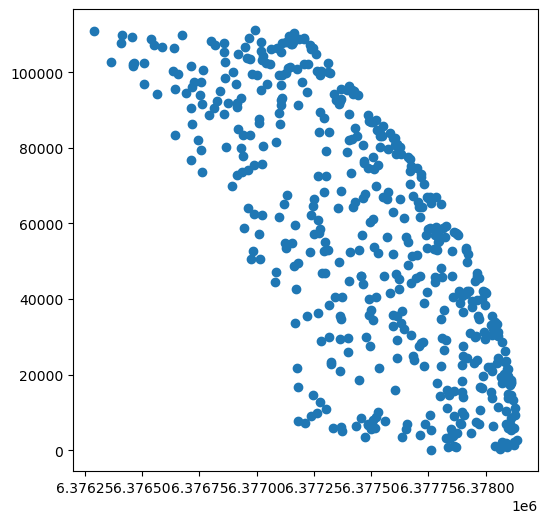

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        data_rand_Monterrey.get_X(),
        data_rand_Monterrey.get_Y(),
    )

In [ ]:
data_rand_Monterrey.crs


<Geocentric CRS: EPSG:6363>
Name: Mexico ITRF2008
Axis Info [cartesian]:
- X[geocentricX]: Geocentric X (metre)
- Y[geocentricY]: Geocentric Y (metre)
- Z[geocentricZ]: Geocentric Z (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:

cluster_all  = Clusters(data_rand_Monterrey)


In [ ]:
cluster_all.data_structure.crs

<Geocentric CRS: EPSG:6363>
Name: Mexico ITRF2008
Axis Info [cartesian]:
- X[geocentricX]: Geocentric X (metre)
- Y[geocentricY]: Geocentric Y (metre)
- Z[geocentricZ]: Geocentric Z (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()